In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from tqdm.notebook import tqdm
import pickle
import timeit
from td_algorithm_funcs import get_prop, get_prop_abs, get_hists, get_rate, simulate_traj
import pandas as pd

In [2]:
# Mean movment in dt -> dx = s*sqrt(dt) -> dx = sqrt(2 D dt)

In [3]:
# k = 1
# tau = 0.5
# D = 1/2
# s = np.sqrt(2*D)
# N_t = 100
# dt = tau/4 if tau > 0 else 5e-2
# dx = 1/2
#sb = 20

k = 3
tau = 0.1
D = 1e-6
s = np.sqrt(2*D)
N_t = 50
dt = tau/5 if tau > 0 else 5e-2
dx = 4e-4 #1e-4
sb = 10*dx#0.005

f = 30
N_p = 8_000


ntau = round(tau/dt)
ts = np.arange(0,N_t)*dt
ts_r = ts[1:]


# jump over zero as x point
x_s = np.arange(-sb,sb+1e-6,dx)
bins = np.arange(-sb-dx/2,sb+dx/2+1e-5,dx)
N_x = len(x_s)

def force(x,*args):
     return -k*x
i_zero = np.argmin(force(x_s)**2)

In [4]:
N_x

21

In [280]:
prop = get_prop(x_s, force,D,dt,dx)
hists, unaltered_props, total_prob = get_hists(N_t = N_t, N_x=N_x,ntau=ntau,i_zero=i_zero,prop=prop)

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

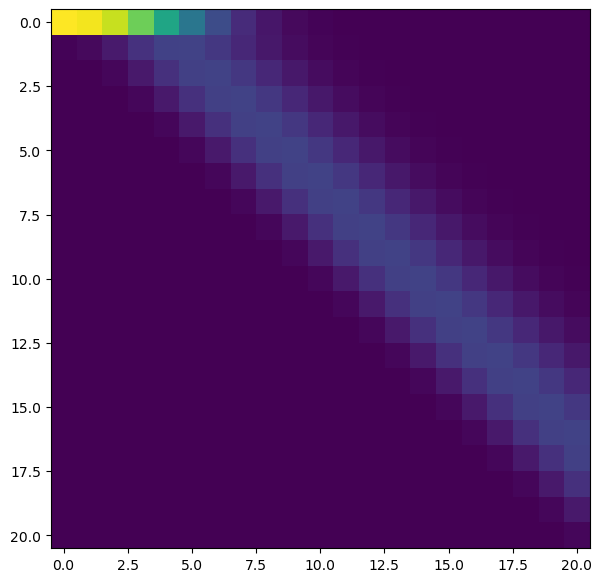

In [268]:
plt.figure(figsize=(15,7))
plt.imshow(prop[-1])

In [269]:
pos = simulate_traj(N_p=N_p, N_loop=1, N_t=(N_t+ntau+2)*f, ntau=ntau*f, s=s, dt=dt/f,border=0, force=force)
all_pos = pos[0]
sim_hists = [np.histogram(all_pos[:,j], bins = bins)[0] for j in tqdm(range(all_pos.shape[-1]))]
sim_ts = np.arange(0, len(all_pos[0]))*dt/f -tau-dt

  0%|          | 0/1559 [00:00<?, ?it/s]

  0%|          | 0/1710 [00:00<?, ?it/s]

In [270]:
all_pos.shape

(8000, 1710)

In [271]:
ntau

5

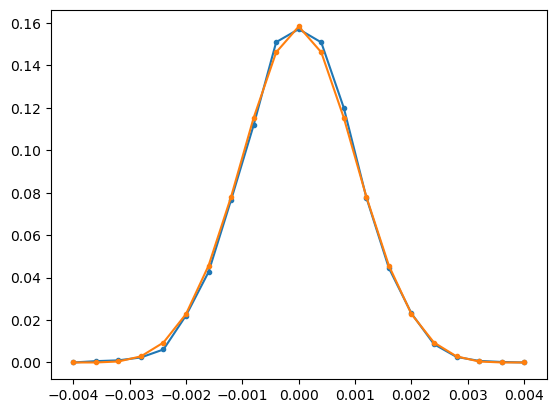

In [272]:
idx = 40
plt.plot(x_s,sim_hists[f*(idx+ntau+1)]/N_p,'.-')
plt.plot(x_s,hists[idx],'.-')

In [273]:
sim_var = np.var(pos, axis = 1)
num_p = hists[:,:]/np.sum(hists, axis = 1)[:,None]
num_var = np.sum(num_p*x_s[None,:]**2 - (num_p*x_s[None,:])**2, axis = 1)

In [274]:
hists.shape

(50, 21)

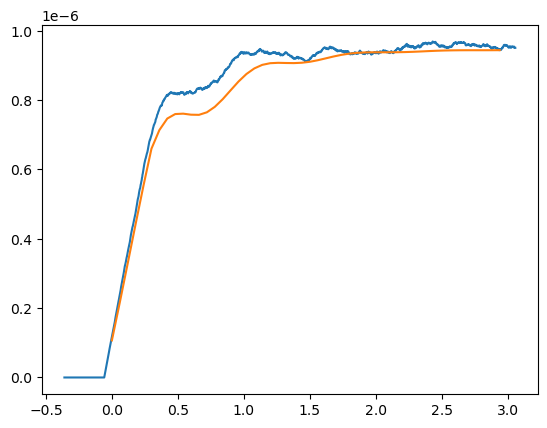

In [275]:
plt.plot(sim_ts,sim_var[0])
plt.plot(ts, num_var)
#plt.xlim(0,4)

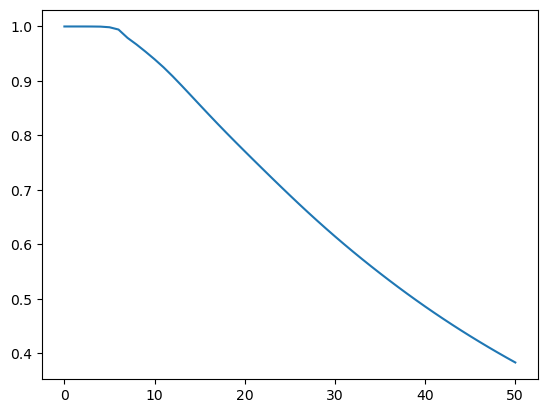

In [276]:
plt.plot(np.cumprod(total_prob))
#plt.ylim(0,2)

In [5]:
prop = get_prop(x_s, force,D,dt,dx)
hists, unaltered_props, total_prob, new_states = get_hists(N_t = N_t, N_x=N_x,ntau=ntau,i_zero=i_zero,prop=prop, return_final_states=True)

  0%|          | 0/50 [00:00<?, ?it/s]

Total number of final states: (7519, 6)


In [6]:
len(new_states)

15883